In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño



Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 3.1 Polinomios de Taylor

### 3.1.1 Explicación

**Problema:**

Dada una función continua, $f(x)$, y con derivadas continuas $f'(x)$, $f''(x)$, etc., se busca representar dicha función mediante un polinomio de grado $n$, en un intervalo alrededor del punto $x=a$.

$$f(x) = \beta_0 + \beta_1 (x-a) + \beta_2 (x-a)^2 + \beta_3 (x-a)^3 + \cdots + \beta_n (x-a)^n$$

Los coeficientes $\beta_i$ se obtienen a partir de las derivadas de la misma función, y esta se escribe como:

$$f(x) = f(a) + f^{\prime}(a) (x-a) + \frac{f^{\prime\prime}(a)}{2!} (x-a)^2 + \frac{f^{\prime\prime\prime}(a)}{3!} (x-a)^3 + \cdots + \frac{f^n(a)}{n!} (x-a)^n + R_n$$

<details>
<summary><b>Derivación</b></summary>

<div class="class alert-info">

**Determinación de los valores de los coeficientes $\beta_i$**:

Los coeficientes $\beta_i$ se determinan a partir de las derivadas de la propia función, y sustituyendo $x=a$.

De forma general los coeficientes están dados por:

$$\beta_i = \frac{f^i(a)}{i!}$$

- Obtención del coeficiente $\beta_0$.

$$f(x) = \beta_0 + \beta_1 (x-a) + \beta_2 (x-a)^2 + \beta_3 (x-a)^3 + \cdots + \beta_n (x-a)^n$$

$$f(a) = \beta_0 + \cancel{\beta_1 (a-a)} + \cancel{\beta_2 (a-a)^2} + \cancel{\beta_3 (a-a)^3} + \cdots + \cancel{\beta_n (a-a)^n}$$

$$\therefore f(a) = \beta_0$$

- Obtención del coeficiente $\beta_1$.

$$f'(x) = \beta_1 + 2\beta_2 (x-a) + 3\beta_3 (x-a)^2 + \cdots + n\beta_n (x-a)^{n-1}$$

$$f'(a) = \beta_1 + \cancel{2\beta_2 (a-a)} + \cancel{3\beta_3 (a-a)^2} + \cdots + \cancel{n\beta_n (a-a)^{n-1}}$$

$$\therefore f'(a) = \beta_1$$

- Obtención del coeficiente $\beta_2$.

$$f''(x) = 2\beta_2 + 3\cdot2\beta_3 (x-a) + \cdots + n\cdot(n-1)\beta_n (x-a)^{n-2}$$

$$f''(a) = 2\beta_2 + \cancel{3\cdot2\beta_3 (a-a)} + \cdots + \cancel{n\cdot(n-1)\beta_n (a-a)^{n-2}}$$

$$\therefore f''(a) = \frac{\beta_2}{2}$$

- Obtención del coeficiente $\beta_3$.

$$f^{\prime\prime\prime}(x) = 3\cdot2\beta_3 + \cdots + n\cdot(n-1)\cdot(n-2)\beta_n (x-a)^{n-3}$$

$$f^{\prime\prime\prime}(a) = 3\cdot2\beta_3 + \cdots + \cancel{n\cdot(n-1)\cdot(n-2)\beta_n (1-a)^{n-3}}$$

$$\therefore f^{\prime\prime\prime}(a) = \frac{\beta_3}{3\cdot2}$$

- Obtención del coefiente $\beta_n$.

$$f^{n}(x) = n\cdot(n-1)\cdot(n-2)\cdots3\cdot2 \beta_i$$

$$f^{n}(a) = n\cdot(n-1)\cdot(n-2)\cdots3\cdot2 \beta_i$$

$$\therefore f^{n} = \frac{\beta_n}{n\cdot(n-1)\cdot(n-2)\cdots3\cdot2}$$

</div>

</details>

### 3.1.2 Ejemplos

#### 3.1.2.1 Función trigonométrica

Obtenga un polinomio de Taylor de orden 2 para aproximar la función $\sin(x)$ alrededor de $x=1$. Usando este polinomio, calcule $\sin(\frac{\pi}{4})$.


- El polinomio de Taylor, aproximado alrededor de $x=1$ se escribe:

$$f(x) = \overbrace{\sin(1)}^{f(a)} + \overbrace{\cos(1)}^{f^{\prime}(a)} (x - 1) + \frac{\overbrace{-\sin(1)}^{f^{\prime\prime}(a)}}{2} (x-1)^2$$



In [2]:
# escritura de la función
def ej1(a, x):
    return np.sin(a) + np.cos(a)*(x-a) - np.sin(a)/2*(x-a)**2

In [3]:
# evaluación de la función
a=1
x=np.pi/4
print(f"Valor de la función: {np.sin(x)}")
print(f"Aproximación de Taylor: {ej1(a, x)}")

Valor de la función: 0.7071067811865475
Aproximación de Taylor: 0.7061445870441343


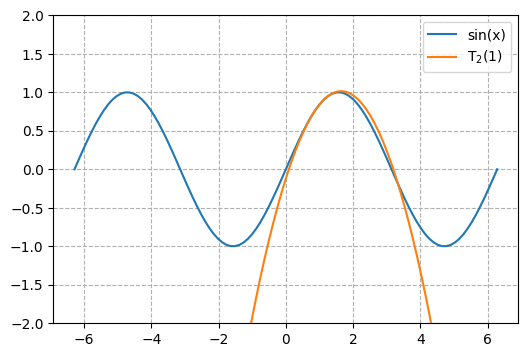

In [4]:
fig, ax = plt.subplots(figsize=(6,4))
x = np.linspace(-2*np.pi, 2*np.pi, 101)
ax.plot(x, np.sin(x), label="sin(x)")
ax.plot(x, ej1(1, x), label=r"T$_2$(1)")
ax.set(ylim=(-2, 2))
ax.grid(ls="--")
ax.legend()
plt.show()

#### 3.1.2.2 Función exponencial

Obtenga un polinomio de Taylor de orden 2 para aproximar la función $\exp(x)$ alrededor de $x=1$. Usando este polinomio, calcule $\exp(1.5)$.


- El polinomio de Taylor, aproximado alrededor de $x=1$ se escribe:

$$f(x) = \overbrace{\exp(1)}^{f(a)} + \overbrace{\exp(1)}^{f^{\prime}(a)} (x - 1) + \frac{\overbrace{\exp(1)}^{f^{\prime\prime}(a)}}{2} (x-1)^2$$



In [5]:
# escritura de la función
def ej2(a, x):
    return np.exp(a) + np.exp(a)*(x-a) + np.exp(a)/2*(x-a)**2

In [6]:
# evaluación de la función
a=1
x=1.5
print(f"Valor de la función: {np.exp(x)}")
print(f"Aproximación de Taylor: {ej2(a, x)}")

Valor de la función: 4.4816890703380645
Aproximación de Taylor: 4.417207971245949


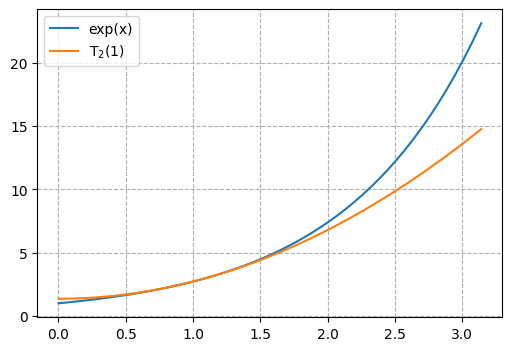

In [7]:
fig, ax = plt.subplots(figsize=(6,4))
x = np.linspace(0, np.pi, 51)
ax.plot(x, np.exp(x), label="exp(x)")
ax.plot(x, ej2(1, x), label=r"T$_2$(1)")
ax.grid(ls="--")
ax.legend()
plt.show()

### 3.1.3 Aproximaciones de series de Taylor utilizando la librería de cálculo simbólico `sympy`.

#### 3.1.3.1 Función trigonométrica

Crear la expresión simbólica

In [8]:
x = sympy.var('x')
taylor_sin = sympy.series(sympy.sin(x), x, 1, n=3)
taylor_sin

sin(1) + (x - 1)*cos(1) - (x - 1)**2*sin(1)/2 + O((x - 1)**3, (x, 1))

Truncar la expresión

In [9]:
taylor_sin = taylor_sin.removeO()
taylor_sin

-(x - 1)**2*sin(1)/2 + (x - 1)*cos(1) + sin(1)

Evaluar la expresión

In [10]:
expr_taylor_sin = sympy.lambdify(x, taylor_sin)
expr_taylor_sin(np.pi/4)

np.float64(0.7061445870441342)

#### 3.1.3.2 Función exponencial

Crear la expresión simbólica

In [11]:
x = sympy.var('x')
taylor_exp = sympy.series(sympy.exp(x), x, 1, n=3)
taylor_exp

E + E*(x - 1) + E*(x - 1)**2/2 + O((x - 1)**3, (x, 1))

Truncar la expresión

In [12]:
taylor_exp = taylor_exp.removeO()
taylor_exp

E*(x - 1)**2/2 + E*(x - 1) + E

Evaluar la expresión

In [13]:
expr_taylor_exp = sympy.lambdify(x, taylor_exp)
expr_taylor_exp(1.5)

4.417207971245948

#### 3.1.3.3 Otro tipo de funciones

In [14]:
x = sympy.var('x')
f = sympy.exp(-x**2)*sympy.cos(x**2)
f

exp(-x**2)*cos(x**2)

In [15]:
taylor_f = sympy.series(f, x, 1, n=3)
taylor_f

exp(-1)*cos(1) + (x - 1)*(-2*exp(-1)*sin(1) - 2*exp(-1)*cos(1)) + (x - 1)**2*(-exp(-1)*cos(1) + 3*exp(-1)*sin(1)) + O((x - 1)**3, (x, 1))

In [16]:
taylor_f = taylor_f.removeO()
taylor_f

(x - 1)**2*(-exp(-1)*cos(1) + 3*exp(-1)*sin(1)) + (x - 1)*(-2*exp(-1)*sin(1) - 2*exp(-1)*cos(1)) + exp(-1)*cos(1)

In [17]:
expr_taylor_f = sympy.lambdify(x, taylor_f)
expr_taylor_f(1.5)

np.float64(-0.1270814964998813)

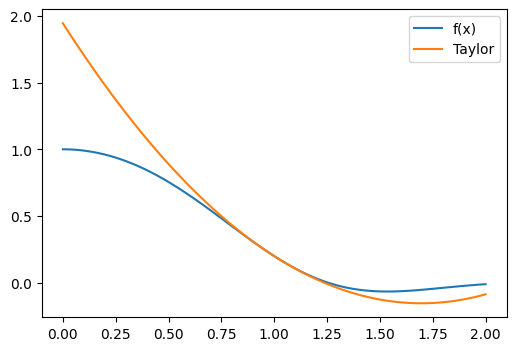

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))

x = np.linspace(0, 2, 101)
ax.plot(x, np.exp(-x**2)*np.cos(x**2), label='f(x)')
ax.plot(x, expr_taylor_f(x), label='Taylor')
ax.legend()
plt.show()